In [13]:
import scipy.sparse as sp
import numpy as np
import scipy.io as io
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
A_PATH = '../data/A.mtx'
B_PATH = '../data/b.txt'
SHAPE_X = 60 
SHAPE_Y = 220

In [15]:
A = pd.read_csv(A_PATH, sep=' ', names=['1', '2', '3'])
b = pd.read_csv(B_PATH).to_numpy()

A = A.to_numpy()
row = A[:,0]
col = A[:,1]
value = A[:,2]

In [16]:
matrix = sp.coo_matrix((value, (row, col)), shape=(SHAPE_X*SHAPE_Y, SHAPE_X*SHAPE_Y)).toarray()

In [17]:
matrix.shape

(13200, 13200)

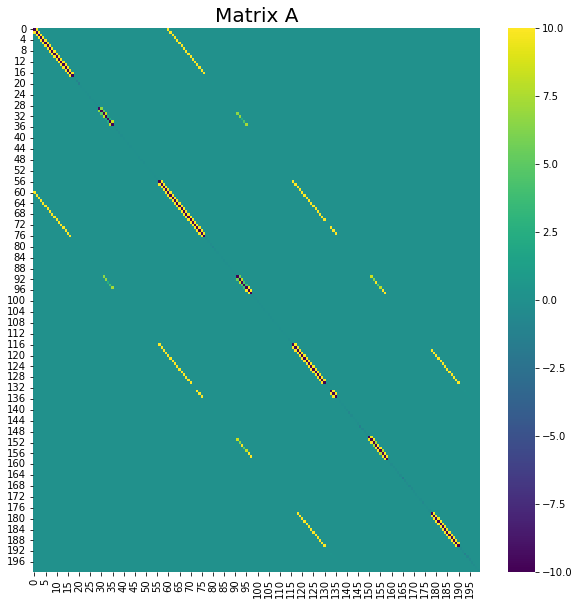

In [18]:
matrix_to_write = matrix[13000:,13000:]
plt.figure(figsize=(10,10))
plt.title("Matrix A", fontsize=20)
sns.heatmap(matrix_to_write, vmin=-10, vmax=10, cmap='viridis')
plt.show()

In [19]:
%%time
solution = sp.linalg.spsolve(matrix, b);

CPU times: user 1.21 s, sys: 233 ms, total: 1.44 s
Wall time: 1.44 s


/usr/lib/python3/dist-packages/scipy/sparse/linalg/_dsolve/linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


In [20]:
np.savetxt('solution.txt', solution[:, None])

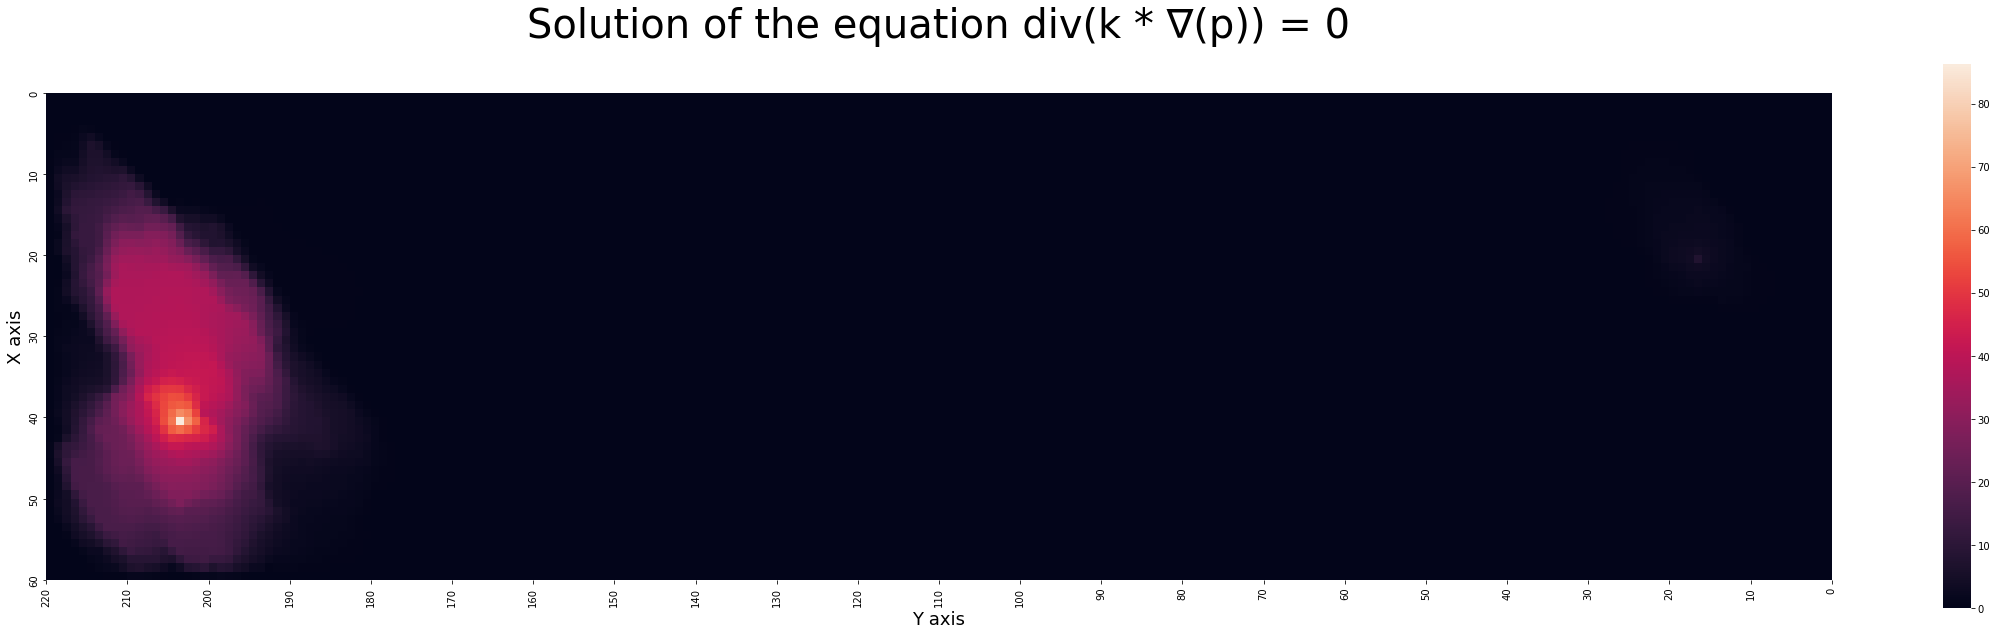

In [21]:
sol = solution.reshape((220,60))
plt.figure(figsize=(40,10))

plt.title("Solution of the equation div(k * ∇(p)) = 0\n", fontsize=40)
ax = sns.heatmap(data=sol.T,square=True)
ax.set_aspect("equal")
ax.set_ylabel('X axis', fontsize=18)
ax.set_xlabel('Y axis', fontsize=18)
ax.set_xticks(list(range(0, 221, 10)))
ax.set_xticklabels(list(range(220, -1, -10)))
ax.set_yticks(list(range(0, 61, 10)))
ax.set_yticklabels(list(range(0, 61, 10)))

plt.show()